Importing all the necessary libraries

In [4]:
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns


In [10]:
# loading the WorldCupMatches.csv file
df = pd.read_csv('WorldCupMatches.csv')
df.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


Checking if Home Team Goals and Away Team Goals columns has null values. Both has about 3720 null values

In [29]:
df['Home Team Goals'].isnull().sum()

3720

In [28]:
df['Away Team Goals'].isnull().sum()

3720

Since both columns have null values, I have to fill the null values so I can be able to create the Column with the sum of the two columns

In [31]:
# filling the null values in Home Team Goals
x = df['Home Team Goals'].mean()
df['Home Team Goals'].fillna(x, inplace=True)
df['Home Team Goals']

0       4.000000
1       3.000000
2       2.000000
3       3.000000
4       1.000000
          ...   
4567    1.811033
4568    1.811033
4569    1.811033
4570    1.811033
4571    1.811033
Name: Home Team Goals, Length: 4572, dtype: float64

In [32]:
# confirming if the null values are filled with the mean value of the column
df['Home Team Goals'].isnull().any()

False

In [34]:
# filling the null values in Home Team Goals
x = df['Away Team Goals'].mean()
df['Away Team Goals'].fillna(x, inplace=True)
df['Away Team Goals']

0       1.0000
1       0.0000
2       1.0000
3       1.0000
4       0.0000
         ...  
4567    1.0223
4568    1.0223
4569    1.0223
4570    1.0223
4571    1.0223
Name: Away Team Goals, Length: 4572, dtype: float64

In [35]:
# confirming if the null values are filled with the mean value of the column
df['Away Team Goals'].isnull().any()

False

In [39]:
# create a new column called Total Goals 
sum_column = df["Home Team Goals"] + df["Away Team Goals"]
df = df.assign(Total_Goals=sum_column)
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Total_Goals
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,...,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,5.0
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,...,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,3.0
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,...,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,3.0
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,...,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,4.0
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,...,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,1.0


c:\Users\STUTERN\Desktop\Stutern\Tiny_python_projects\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'Rectangle' object has no property 'title'

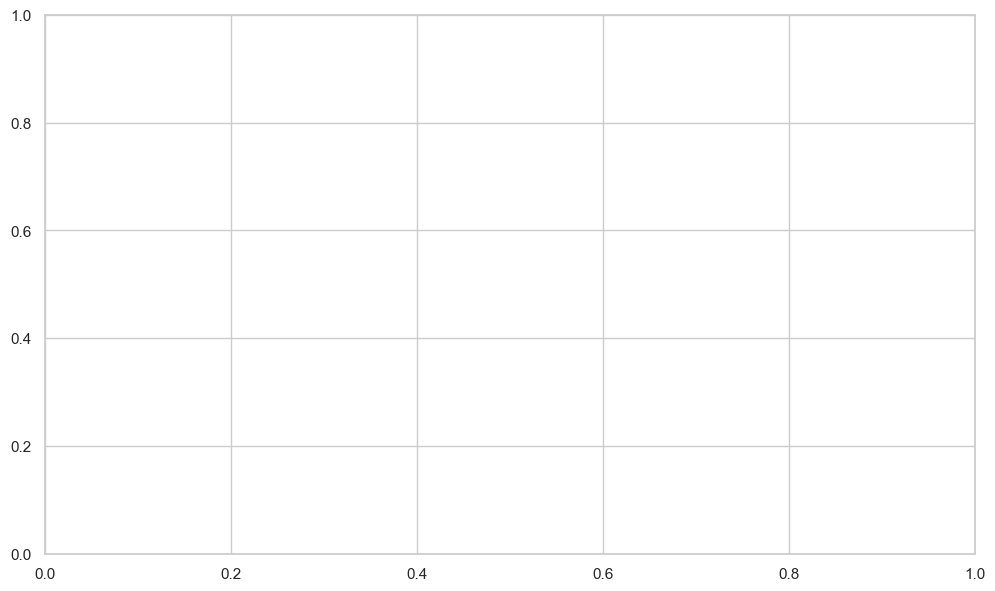

In [81]:

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(df.Year, df.Total_Goals, ax=ax, ci=None).set(title= 'A Graph of Year against Total Goals scored in WorldCup from 1930-2014')
sns.set_style("whitegrid")